# Load Dataset

In [7]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt
from sklearn import preprocessing
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder, MinMaxScaler
from sklearn.feature_selection import SelectKBest, chi2, f_classif

# Load Dataset
url = 'https://raw.githubusercontent.com/yulianamuksin/Machine-Learning-Algorithms-on-Mixed-High-Dimensional-Dataset/master/dataset.csv'
data = pd.read_csv(url)

# Select only columns to consider from index 2 to 30
data = data.iloc[:,0:30]

# Display selected columns
data

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (50,51,52,53,54,55,56,57,58,62,63,64,66,69,70,78,79,81,82,83,84,85) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,host_id,host_name,host_response_time,host_response_rate,host_acceptance_rate,host_neighbourhood,host_listings_count,host_total_listings_count,neighbourhood,neighbourhood_cleansed,property_type,room_type,accommodates,bathrooms,bedrooms,beds,price,guests_included,extra_people,minimum_nights,maximum_nights,minimum_minimum_nights,maximum_minimum_nights,minimum_maximum_nights,maximum_maximum_nights,number_of_reviews,number_of_reviews_ltm,review_scores_rating,reviews_per_month
0,35303,151977,Miyuki,NaN,NaN,NaN,Shibuya District,3,3,Shibuya District,Shibuya Ku,Apartment,Private room,1,1,1,1,"$4,183.00",1,$0.00,28,1125,28,28,1125,1125,18,0,94,0.18
1,197677,964081,Yoshimi & Marek,within a few hours,100%,88%,Sumida District,1,1,Sumida District,Sumida Ku,Apartment,Entire home/apt,2,1,1,2,"$11,048.00",1,$0.00,3,365,3,3,365,365,165,11,95,1.57
2,289597,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$4,171.00",1,"$1,070.00",28,180,1,30,180,180,113,7,95,1.18
3,370759,1573631,"Gilles,Mayumi,Taiki",within a day,100%,93%,Setagaya District,3,3,Setagaya District,Setagaya Ku,Apartment,Entire home/apt,2,1,0,1,"$6,952.00",1,$0.00,28,720,28,28,720,720,103,5,95,1.39
4,700253,341577,Hide&Kei,within a few hours,100%,82%,Nerima District,2,2,Nerima District,Nerima Ku,Apartment,Entire home/apt,2,1,1,1,"$3,957.00",1,"$1,070.00",28,180,1,28,180,180,103,3,96,1.12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,43260549,191971770,Hostel,NaN,NaN,NaN,NaN,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,2,1.5,1,1,"$5,027.00",1,$0.00,1,365,1,3,365,365,0,0,NaN,NaN
13045,43260684,191971770,Hostel,NaN,NaN,NaN,NaN,3,3,Chiyoda District,Chiyoda Ku,Hostel,Private room,3,1.5,1,3,"$5,455.00",1,$0.00,1,365,1,3,365,365,0,0,NaN,NaN
13046,43272924,335257890,Blue,within an hour,100%,100%,NaN,0,0,Shinjuku District,Shinjuku Ku,Hotel,Private room,1,1,1,0,"$6,972.00",1,$0.00,28,30,28,28,1125,1125,0,0,NaN,NaN
13047,43281694,333948576,Kido,NaN,NaN,NaN,NaN,0,0,Shibuya District,Shibuya Ku,House,Entire home/apt,15,2,3,9,"$24,992.00",1,$0.00,1,90,1,1,90,90,0,0,NaN,NaN


# Choose 12 main features randomly from the dataset

The features selected are: 
- 12 main features 
- 2 target features (price and review_scores_rating)

In [8]:
# Choose 12 main features randomly and 2 target features
data = data[['host_response_time', 'host_total_listings_count', 'room_type', 'accommodates', 'bathrooms', 'bedrooms',
       'beds', 'guests_included', 'minimum_nights', 'maximum_nights', 'number_of_reviews_ltm', 'reviews_per_month',
       'price', 'review_scores_rating']]

# Analyze Dataset to determine Preprocessing methods

The selected columns are of **Object-type** (mixed categorical and numerical values) and contain **missing values** (null).

Missing values are frequently indicated by out-of-range entries; perhaps a negative number (e.g., -1) in a numeric field that is normally only positive, or a 0 in a numeric field that can never normally be 0. 

Many popular predictive models such as support vector machines, the glmnet, and neural networks, cannot tolerate any amount of missing values. Different “missing value” strategies may be needed for different columns.

In [9]:
# Count total missing values at each column in DataFrame
data.isnull().sum()

host_response_time            850
host_total_listings_count      21
room_type                       4
accommodates                    3
bathrooms                       5
bedrooms                       21
beds                           34
guests_included                52
minimum_nights                 29
maximum_nights                 29
number_of_reviews_ltm           0
reviews_per_month            1939
price                         202
review_scores_rating         1974
dtype: int64

# Preprocess Data

Do data preprocessing and cleaning using several methods:

- **Label or Ordinal Encoding** to transform ordinal features (features with ordered levels such as host_response_time) into numbers by mapping every level onto a number, in a way that preserves the encoding.

- Replace missing values and out-of-range entries in each columns with **NaN**.

- Replace each NaN value with the **mean** of its column.

The NaN values are not dropped since most columns contains missing values and out-of-range entries. So, the best strategy would be to replace those values with the mean of their columns, **to ensure that there are still a sufficient number of records left to train a predictive model.**

In [ ]:
data.host_response_time = np.where(data.host_response_time == "within an hour", 4, 
                            np.where(data.host_response_time == "within a few hours", 3, 
                            np.where(data.host_response_time == "within a day", 2, 
                            np.where(data.host_response_time == "a few days or more", 1, None))))

data.host_total_listings_count = np.where(data.host_total_listings_count.str.isnumeric(), data.host_total_listings_count, None)

data.room_type = np.where(data.room_type == "Entire home/apt", 4, 
                            np.where(data.room_type == "Private room", 3, 
                            np.where(data.room_type == "Hotel room", 2, 
                            np.where(data.room_type == "Shared room", 1, None))))

data.accommodates = np.where(data.accommodates.str.isnumeric(), data.accommodates, None)

data.bathrooms = np.where(data.bathrooms.str.isnumeric(), data.bathrooms, None)

data.bedrooms = np.where(data.bedrooms.str.isnumeric(), data.bedrooms, None)

data.beds = np.where(data.beds.str.isnumeric(), data.beds, None)

data.price = np.where(data.price.str.match('\$.*'), data.price.str.replace('$','').str.replace(',','').str.replace('\.00',''), None)

data.guests_included = np.where(data.guests_included.str.isnumeric(), data.guests_included, None)

data.minimum_nights = np.where(data.minimum_nights.str.isnumeric(), data.minimum_nights, None)

data.maximum_nights = np.where(data.maximum_nights.str.isnumeric(), data.maximum_nights, None)

data.number_of_reviews_ltm = np.where(data.number_of_reviews_ltm.str.isnumeric(), data.number_of_reviews_ltm, None)

data.review_scores_rating = np.where(data.review_scores_rating.str.isnumeric(), data.review_scores_rating, None)

data.reviews_per_month = data.reviews_per_month.str.replace('\.','')
data.reviews_per_month = np.where(data.reviews_per_month.str.isnumeric(), data.reviews_per_month, None)

data = data.apply(pd.to_numeric)

data.reviews_per_month /= 100

data.review_scores_rating = np.where(data.review_scores_rating<=100, data.review_scores_rating, None)

print(data.describe())
data = data.fillna(np.mean(data))

# data

       host_response_time  host_total_listings_count     room_type  \
count        11951.000000               12913.000000  12711.000000   
mean             3.862773                  15.429645      3.565416   
std              0.435741                  21.528738      0.780635   
min              1.000000                   0.000000      1.000000   
25%              4.000000                   3.000000      3.000000   
50%              4.000000                   8.000000      4.000000   
75%              4.000000                  19.000000      4.000000   
max              4.000000                 196.000000      4.000000   

       accommodates     bathrooms      bedrooms          beds  \
count  12711.000000  10918.000000  12911.000000  1.293300e+04   
mean       4.462355      1.333761      1.369840  9.242094e+01   
std        3.178084      1.235997      1.438516  1.020028e+04   
min        1.000000      0.000000      0.000000  0.000000e+00   
25%        2.000000      1.000000      1.000

C:\Users\Computer\anaconda3\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [ ]:
data.describe()

,host_response_time,host_total_listings_count,room_type,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews_ltm,reviews_per_month,price,review_scores_rating
count,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000,1.304900e+04,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000,13049.000000
mean,3.862773,15.429645,3.565416,4.462355,1.333761,1.369840,9.242094e+01,2.370181,3.553787,635.935240,13.473717,1.499473,26819.531115,92.452537
std,0.417004,21.416246,0.770458,3.136650,1.130569,1.430888,1.015484e+04,1.935019,9.706174,479.154241,33.156279,1.229842,79482.614669,8.450157
min,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000e+00,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,4.000000,3.000000,3.000000,2.000000,1.000000,1.000000,1.000000e+00,1.000000,1.000000,100.000000,1.000000,0.490000,6952.000000,91.000000
50%,4.000000,8.000000,4.000000,4.000000,1.000000,1.000000,2.000000e+00,2.000000,1.000000,365.000000,8.000000,1.499473,11979.000000,93.000000
75%,4.000000,19.000000,4.000000,6.000000,1.333761,1.369840,4.000000e+00,3.000000,2.000000,1125.000000,19.000000,2.090000,21989.000000,97.000000
max,4.000000,196.000000,4.000000,16.000000,50.000000,50.000000,1.160013e+06,27.000000,365.000000,1125.000000,1125.000000,21.010000,999995.000000,100.000000


# Feature Engineering

Logistic Regression is a binary regression model which is used to predict something with binary values such as True/False, 1/0, etc. Hence, we have to transform the 'price' and 'review_scores_rating' from numerical into ordinal (categorical) values, in order to classify them using Logistic Regression:

'price' will be transformed into 3 categories: 
- expensive(2) 
- average(1)
- cheap (0)

'review_scores_rating' will be transformed into 5 categories: 
- very good(4)
- good(3) 
- average(2) 
- bad(1)
- very bad(0)

We will also use these engineered features in other algorithms as well.

In [12]:
data.price = np.where(data.price < 10000, 0,
                np.where(data.price < 20000, 1, 2))

data.review_scores_rating = np.where(data.review_scores_rating < 20, 0,
                np.where(data.review_scores_rating < 40, 1,
                np.where(data.review_scores_rating < 60, 2,
                np.where(data.review_scores_rating < 80, 3, 4))))

data

,host_response_time,host_total_listings_count,room_type,accommodates,bathrooms,bedrooms,beds,guests_included,minimum_nights,maximum_nights,number_of_reviews_ltm,reviews_per_month,price,review_scores_rating
0,3.862773,3.0,3.0,1.0,1.000000,1.0,1.0,1.0,28.0,1125.0,0.0,0.180000,0,4
1,3.000000,1.0,4.0,2.0,1.000000,1.0,2.0,1.0,3.0,365.0,11.0,1.570000,1,4
2,3.000000,2.0,4.0,2.0,1.000000,1.0,1.0,1.0,28.0,180.0,7.0,1.180000,0,4
3,2.000000,3.0,4.0,2.0,1.000000,0.0,1.0,1.0,28.0,720.0,5.0,1.390000,0,4
4,3.000000,2.0,4.0,2.0,1.000000,1.0,1.0,1.0,28.0,180.0,3.0,1.120000,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13044,3.862773,3.0,3.0,2.0,1.333761,1.0,1.0,1.0,1.0,365.0,0.0,1.499473,0,4
13045,3.862773,3.0,3.0,3.0,1.333761,1.0,3.0,1.0,1.0,365.0,0.0,1.499473,0,4
13046,4.000000,0.0,3.0,1.0,1.000000,1.0,0.0,1.0,28.0,30.0,0.0,1.499473,0,4
13047,3.862773,0.0,4.0,15.0,2.000000,3.0,9.0,1.0,1.0,90.0,0.0,1.499473,2,4


# Separate training and testing dataset

In [13]:
from sklearn.model_selection import train_test_split

dataTrain, dataTest = train_test_split(data, test_size=0.2)

# Separate input data and target features

In [14]:
dataInputMain = dataTrain.drop(columns=['price','review_scores_rating'])

dataPrice = dataTrain.price

dataReview = dataTrain.review_scores_rating

dataInputMainTest = dataTest.drop(columns=['price','review_scores_rating'])

dataPriceTest = dataTest.price

dataReviewTest = dataTest.review_scores_rating

# Develop Machine Learning Models

# I.  Logistic Regression

- Logistic Regression Prediction of 'price' using 12 chosen features

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

logreg = LogisticRegression().fit(dataInputMain,dataPrice)

predicttrain = logreg.predict(dataInputMain)

print("Logistic regression price training evaluation ")
cm = confusion_matrix(predicttrain, dataPrice)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataPrice)}")

predicttest = logreg.predict(dataInputMainTest)

print("\n\nLogistic regression price testing evaluation ")
cm = confusion_matrix(predicttest, dataPriceTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataPriceTest)}")

Logistic regression price training evaluation 

Confusion Matrix
[[4058 1493  967]
 [ 310  579  421]
 [ 359  831 1421]]

Accuracy = 0.5803237858032378


Logistic regression price testing evaluation 

Confusion Matrix
[[965 428 225]
 [ 83 139 108]
 [ 74 191 397]]

Accuracy = 0.575095785440613


C:\Users\Computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


- Logistic Regression Prediction of 'price' using Feature Selection

In [16]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression

score = np.zeros(12)

for i in range (12):
    selector = RFE(LogisticRegression(), n_features_to_select=i+1, step=1).fit(dataInputMain, dataPrice)
    score[i] = selector.score(dataInputMain, dataPrice)

selector = RFE(LogisticRegression(), n_features_to_select=np.argmax(score)+1, step=1).fit(dataInputMain, dataPrice)
selector.ranking_

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


array([1, 2, 1, 1, 1, 1, 1, 1, 1, 4, 3, 1])

In [ ]:
dataInputNew = dataInputMain.drop(columns=['host_total_listings_count','minimum_nights','maximum_nights'])

dataInputNewTest = dataInputMainTest.drop(columns=['host_total_listings_count','minimum_nights','maximum_nights'])

logreg = LogisticRegression().fit(dataInputNew,dataPrice)

predicttrain = logreg.predict(dataInputNew)

print("Logistic regression price training evaluation ")
cm = confusion_matrix(predicttrain, dataPrice)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataPrice)}")

predicttest = logreg.predict(dataInputNewTest)

print("\n\nLogistic regression price testing evaluation ")
cm = confusion_matrix(predicttest, dataPriceTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataPriceTest)}")

Logistic regression price training evaluation 

Confusion Matrix
[[4188 1546 1017]
 [ 363  747  521]
 [ 176  610 1271]]

Accuracy = 0.5945013890219369


Logistic regression price testing evaluation 

Confusion Matrix
[[1010  434  250]
 [  89  183  152]
 [  23  141  328]]

Accuracy = 0.5827586206896552


C:\Users\Computer\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


# Logistic Regression Results Comparison

12 Features:
- Train = 0.58 
- Test  = 0.57

Feature Selection:
- Train = 0.59 
- Test  = 0.58 

# II. K-Nearest Neighbour Classification

- K-Nearest Neighbour Prediction of 'review_scores_rating' using 12 chosen features

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier().fit(dataInputMain,dataReview)

predicttrain = neigh.predict(dataInputMain)

print("K-Nearest Neighbour review training evaluation ")
cm = confusion_matrix(predicttrain, dataReview)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataReview)}")

predicttest = neigh.predict(dataInputMainTest)

print("\n\nK-Nearest Neighbour review testing evaluation ")
cm = confusion_matrix(predicttest, dataReviewTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataReviewTest)}")

K-Nearest Neighbour review training evaluation 

Confusion Matrix
[[  10    1    0    0    4]
 [   1    6    0    0    3]
 [   0    0    1    0    0]
 [   5    0    2   75   31]
 [   7   11   22  284 9976]]

Accuracy = 0.9644601973369097


K-Nearest Neighbour review testing evaluation 

Confusion Matrix
[[   4    1    0    0    1]
 [   1    1    0    0    0]
 [   0    0    0    0    0]
 [   2    0    0   10   13]
 [   1    2    4   69 2501]]

Accuracy = 0.963984674329502


- K-Nearest Neighbour Prediction of 'review_scores_rating' using Feature Selection

KNN is one of the algorithms whose features cannot be scored using RFE. Hence, for KNN we can use **selectKBest** to give score to each feature. The last 3 features with the lowest scores will not be used to do the prediction.

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

feature = SelectKBest(score_func=f_classif, k='all').fit(dataInputMain,dataReview)

scoredf = pd.DataFrame(feature.scores_)
columndf = pd.DataFrame(dataInputMain.columns)

featurescore = pd.concat([columndf, scoredf], axis=1)
featurescore.columns = ['Feature', 'Score']

print(featurescore.nlargest(12,'Score'))

                      Feature       Score
10      number_of_reviews_ltm  137.516166
6                        beds  118.591471
11          reviews_per_month   31.314770
3                accommodates    6.171236
1   host_total_listings_count    5.697375
9              maximum_nights    4.452356
7             guests_included    3.049421
0          host_response_time    2.339394
2                   room_type    2.126788
5                    bedrooms    1.179706
4                   bathrooms    0.654864
8              minimum_nights    0.204493


In [ ]:
dataInputNew = dataInputMain.drop(columns=['bedrooms','minimum_nights','bathrooms'])

dataInputNewTest = dataInputMainTest.drop(columns=['bedrooms','minimum_nights','bathrooms'])

neigh = KNeighborsClassifier().fit(dataInputNew,dataReview)

predicttrain = neigh.predict(dataInputNew)

print("K-Nearest Neighbour review training evaluation ")
cm = confusion_matrix(predicttrain, dataReview)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataReview)}")

predicttest = neigh.predict(dataInputNewTest)

print("\n\n\nK-Nearest Neighbour review testing evaluation ")
cm = confusion_matrix(predicttest, dataReviewTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataReviewTest)}")

K-Nearest Neighbour review training evaluation 

Confusion Matrix
[[   9    1    0    0    4]
 [   1    6    0    0    3]
 [   0    0    0    1    0]
 [   5    0    3   76   26]
 [   8   11   22  282 9981]]

Accuracy = 0.9648433758022799



K-Nearest Neighbour review testing evaluation 

Confusion Matrix
[[   4    1    0    0    1]
 [   1    1    0    0    0]
 [   0    0    0    1    0]
 [   2    0    0    9   12]
 [   1    2    4   69 2502]]

Accuracy = 0.963984674329502


# K-Nearest Neighbour Classification Results Comparison

### 1. Price
#### Logistic Regression
12 Features:
- Train = 0.58 
- Test  = 0.57 

Feature Selection:
- Train = 0.59 
- Test  = 0.58 

#### Nearest Neighbour Classification (KNN)

12 Features:
- Train = 0.78
- Test  = 0.69 

Feature Selection:
- Train = 0.81 
- Test  = 0.72

### 2. Review Score Rating

#### Nearest Neighbour Classification (KNN)

12 Features:
- Train = 0.9644 
- Test  = 0.9639 

Feature Selection:
- Train = 0.9648 
- Test  = 0.9639

# III. Support Vector Machine Classification (SVM)

- SVM Prediction of 'review_scores_rating' using 12 chosen features

In [ ]:
from sklearn import svm

svc = svm.SVC().fit(dataInputMain,dataReview)
predicttrain = svc.predict(dataInputMain)

print("Support vector machine review training evaluation ")
cm = confusion_matrix(predicttrain, dataReview)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataReview)}")

predicttest = svc.predict(dataInputMainTest)

print("\n\nSupport vector machine review testing evaluation ")
cm = confusion_matrix(predicttest, dataReviewTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataReviewTest)}")

Support vector machine review training evaluation 

Confusion Matrix
[[    1     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [   22    18    25   359 10014]]

Accuracy = 0.9593830826707539


Support vector machine review testing evaluation 

Confusion Matrix
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   8    4    4   79 2515]]

Accuracy = 0.9636015325670498


- SVM Prediction of 'review_scores_rating' using feature selection

SVC is one of the algorithms whose features cannot be scored using RFE. Hence, for SVC we use the features chosen in KNN and **selectKBest**.

In [ ]:
dataInputNew = dataInputMain.drop(columns=['bedrooms','minimum_nights','bathrooms'])

dataInputNewTest = dataInputMainTest.drop(columns=['bedrooms','minimum_nights','bathrooms',])

svc = svm.SVC().fit(dataInputNew,dataReview)

predicttrain = svc.predict(dataInputNew)

print("Support vector classification review training evaluation ")
cm = confusion_matrix(predicttrain, dataReview)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataReview)}")

predicttest = svc.predict(dataInputNewTest)

print("\n\n\Support Vector Classifictaion review testing evaluation ")
cm = confusion_matrix(predicttest, dataReviewTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataReviewTest)}")

Support vector classification review training evaluation 

Confusion Matrix
[[    1     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [    0     0     0     0     0]
 [   22    18    25   359 10014]]

Accuracy = 0.9593830826707539


\Support Vector Classifictaion review testing evaluation 

Confusion Matrix
[[   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   0    0    0    0    0]
 [   8    4    4   79 2515]]

Accuracy = 0.9636015325670498


- SVM Prediction of 'price' using 12 chosen features

In [ ]:
svc = svm.SVC().fit(dataInputMain,dataPrice)

predicttrain = svc.predict(dataInputMain)

print("Support vector classification price training evaluation ")
cm = confusion_matrix(predicttrain, dataPrice)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataPrice)}")

predicttest = svc.predict(dataInputMainTest)

print("\n\n\nSupport vector classification price testing evaluation ")
cm = confusion_matrix(predicttest, dataPriceTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataPriceTest)}")

Support vector classification price training evaluation 

Confusion Matrix
[[4727 2903 2808]
 [   0    0    0]
 [   0    0    1]]

Accuracy = 0.452916946067631



Support vector classification price testing evaluation 

Confusion Matrix
[[1122  758  730]
 [   0    0    0]
 [   0    0    0]]

Accuracy = 0.4298850574712644


- SVM Prediction of 'price' using Feature Selection

In [ ]:
dataInputNew = dataInputMain.drop(columns=['number_of_reviews_ltm','reviews_per_month', 'beds'])

dataInputNewTest = dataInputMainTest.drop(columns=['number_of_reviews_ltm','reviews_per_month', 'beds'])

svc = svm.SVC().fit(dataInputNew,dataPrice)

predicttrain = svc.predict(dataInputNew)

print("Support vector classification price training evaluation ")
cm = confusion_matrix(predicttrain, dataPrice)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataPrice)}")

predicttest = svc.predict(dataInputNewTest)

print("\n\nSupport vector classification price testing evaluation ")
cm = confusion_matrix(predicttest, dataPriceTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataPriceTest)}")

Support vector classification price training evaluation 

Confusion Matrix
[[3998 2365 1739]
 [   0    0    0]
 [ 729  538 1070]]

Accuracy = 0.4854871156241019


Support vector classification price testing evaluation 

Confusion Matrix
[[925 627 456]
 [  0   0   0]
 [197 131 274]]

Accuracy = 0.45938697318007665


# Support Vector Machine Classification Results Comparison

### 1. Price
#### Logistic Regression
12 Features:
- Train = 0.58 
- Test  = 0.57 

Feature Selection:
- Train = 0.59 
- Test  = 0.58 

#### Nearest Neighbour Classification (KNN)
12 Features:
- Train = 0.78 
- Test  = 0.69 

Feature Selection:
- Train = 0.81 
- Test  = 0.72 

#### Support Vector Machine Classification (SVC)
12 Features:
- Train = 0.45 
- Test  = 0.42 

Feature Selection:
- Train = 0.48 (feature selection)
- Test  = 0.45 (feature selection)


### 2. Review Scores Rating

#### Nearest Neighbour Classification (KNN)
12 Features:
- Train = 0.9644 
- Test  = 0.9639 

Feature Selection:
- Train = 0.9648 
- Test  = 0.9639 

#### Support Vector Machine Classification (SVC)
12 Features:
- Train = 0.9593 
- Test  = 0.9636 

Feature Selection:
- Train = 0.9593 
- Test  = 0.9636 

# IV. Decision Tree Classifier

- Decision Tree Classifier Prediction of 'review_scores_rating' using 12 chosen features

In [ ]:
from sklearn import tree

treeclf = tree.DecisionTreeClassifier().fit(dataInputMain,dataReview)
predicttrain = treeclf.predict(dataInputMain)

print("Decision tree classifier review training evaluation ")
cm = confusion_matrix(predicttrain, dataReview)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataReview)}")

predicttest = treeclf.predict(dataInputMainTest)

print("\n\nDecision tree classifier review testing evaluation ")
cm = confusion_matrix(predicttest, dataReviewTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataReviewTest)}")

Decision tree classifier review training evaluation 

Confusion Matrix
[[   23     1     0     2     2]
 [    0    17     0     0     1]
 [    0     0    25     1     2]
 [    0     0     0   354     8]
 [    0     0     0     2 10001]]

Accuracy = 0.9981799022894914


Decision tree classifier review testing evaluation 

Confusion Matrix
[[   8    1    0    0    2]
 [   0    2    0    0    3]
 [   0    0    0    1    8]
 [   0    0    0   17   85]
 [   0    1    4   61 2417]]

Accuracy = 0.9363984674329502


- Decision Tree Classifier Prediction of 'review_scores_rating' using Feature Selection 

In [ ]:
score = np.zeros(12)

for i in range (12):
    selector = RFE(tree.DecisionTreeClassifier(), n_features_to_select=i+1, step=1).fit(dataInputMain, dataReview)
    score[i] = selector.score(dataInputMain, dataReview)
    
print(score)

[0.95938308 0.97662611 0.99339017 0.99578504 0.99712616 0.99779672
 0.99808411 0.99808411 0.99808411 0.99808411 0.9981799  0.9981799 ]


In [ ]:
selector = RFE(tree.DecisionTreeClassifier(), n_features_to_select=np.argmax(score)+1, step=1).fit(dataInputMain, dataReview)
selector.ranking_

array([2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [ ]:
dataInputNew = dataInputMain.drop(columns=['host_response_time'])

dataInputNewTest = dataInputMainTest.drop(columns=['host_response_time'])

treeclf = tree.DecisionTreeClassifier().fit(dataInputNew,dataReview)

predicttrain = treeclf.predict(dataInputNew)

print("Tree decision classifier review training evaluation ")
cm = confusion_matrix(predicttrain, dataReview)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataReview)}")

predicttest = treeclf.predict(dataInputNewTest)

print("\n\n\nTree decision classifier review testing evaluation ")
cm = confusion_matrix(predicttest, dataReviewTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataReviewTest)}")

Tree decision classifier review training evaluation 

Confusion Matrix
[[   23     1     0     2     2]
 [    0    17     0     0     1]
 [    0     0    25     1     2]
 [    0     0     0   354     8]
 [    0     0     0     2 10001]]

Accuracy = 0.9981799022894914



Tree decision classifier review testing evaluation 

Confusion Matrix
[[   8    2    0    0    2]
 [   0    1    0    2    2]
 [   0    0    0    0    3]
 [   0    0    0   15   78]
 [   0    1    4   62 2430]]

Accuracy = 0.9402298850574713


- Decision Tree Classifier Prediction of 'price' using 12 chosen features

In [ ]:
treeclf = tree.DecisionTreeClassifier().fit(dataInputMain,dataPrice)
predicttrain = treeclf.predict(dataInputMain)

print("Decision tree classifier price training evaluation ")
cm = confusion_matrix(predicttrain, dataPrice)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttrain, dataPrice)}")

predicttest = treeclf.predict(dataInputMainTest)

print("\n\nDecision tree classifier price testing evaluation ")
cm = confusion_matrix(predicttest, dataPriceTest)
print("\nConfusion Matrix")
print(cm)

print(f"\nAccuracy = {accuracy_score(predicttest, dataPriceTest)}")

Decision tree classifier price training evaluation 

Confusion Matrix
[[4719    6    3]
 [   5 2896    0]
 [   3    1 2806]]

Accuracy = 0.9982756969058338


Decision tree classifier price testing evaluation 

Confusion Matrix
[[841 174  68]
 [201 448 140]
 [ 80 136 522]]

Accuracy = 0.6938697318007663


- Decision Tree Classifier Prediction of 'price' using Feature Selection

In [ ]:
score = np.zeros(12)

for i in range (12):
    selector = RFE(tree.DecisionTreeClassifier(), n_features_to_select=i+1, step=1).fit(dataInputMain, dataPrice)
    score[i] = selector.score(dataInputMain, dataPrice)
    
print(score)

[0.50225117 0.77564901 0.93265638 0.95612607 0.97557237 0.98601399
 0.99157007 0.99396494 0.99511447 0.99597663 0.99760513 0.9982757 ]


In [ ]:
selector = RFE(tree.DecisionTreeClassifier(), n_features_to_select=np.argmax(score)+1, step=1).fit(dataInputMain, dataPrice)
selector.ranking_

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

Based on the above Feature Selection result, we can see that there are again 12 chosen features. Hence, we do not need to remove any of the 12 chosen features (because using all 12 of them would yield the best results, instead of reducing the features).

# Decision Tree Classifier Results Comparison

### 1. Price
#### Logistic Regression
12 Features:
- Train = 0.58 
- Test  = 0.57 

Feature Selection:
- Train = 0.59 
- Test  = 0.58

#### Nearest Neighbour Classification (KNN)
12 Features:
- Train = 0.78 
- Test  = 0.69 

Feature Selection:
- Train = 0.81 
- Test  = 0.72 

#### Support Vector Machine Classification (SVC)
12 Features:
- Train = 0.45 
- Test  = 0.42 

Feature Selection:
- Train = 0.48 
- Test  = 0.45 

#### Decision Tree Classifier
12 Features:
- Train = 0.99 
- Test  = 0.69 

Feature Selection:

RFE result showed that the highest classification result using Decision Tree requires all 12 features, hence there is no need to apply feature selection. 

### 2. Review Scores Rating

#### Nearest Neighbour Classification (KNN)
12 Features:
- Train = 0.9644 
- Test  = 0.9639 

Feature Selection:
- Train = 0.9648 
- Test  = 0.9639 

#### Support Vector Machine Classification (SVC)
12 Features:
- Train = 0.9593 
- Test  = 0.9636 

Feature Selection:
- Train = 0.9593 
- Test  = 0.9636 

#### Decision Tree Classifier
12 Features:
- Train = 0.9981 
- Test  = 0.9363 

Feature Selection:
- Train = 0.9981 
- Test  = 0.9402

# V. Gaussian Mixture Model (GMM)

### Data Distribution of 'review_scores_rating' 

In [ ]:
from sklearn import mixture
import matplotlib.pyplot as plt

gmm = mixture.GaussianMixture(n_components=5, init_params='random').fit(dataInputMain)
predicttrain = gmm.predict(dataInputMain)
predicttest = gmm.predict(dataInputMainTest)

- Plot of 'review_scores_rating' training data using GMM

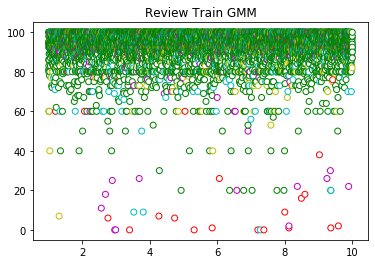

Kategori 'very bad' (0) sebagian besar berada pada cluster 0

Jumlah data
cluster 0 = 14
cluster 2 = 3
cluster 3 = 1
cluster 4 = 5

Kategori 'bad' (1) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 2
cluster 1 = 8
cluster 2 = 1
cluster 4 = 7


Kategori 'average' (2) sebagian besar berada pada cluster 1

Jumlah data
cluster 1 = 19
cluster 2 = 2
cluster 3 = 3
cluster 4 = 1


Kategori 'good' (3) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 6
cluster 1 = 261
cluster 2 = 45
cluster 3 = 30
cluster 4 = 17


Kategori 'very good' (4) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 82
cluster 1 = 7246
cluster 2 = 1293
cluster 3 = 919
cluster 4 = 474


In [ ]:
x = np.linspace(1, 10, num=len(dataReview))
colors = np.where(predicttrain==0,'r',
            np.where(predicttrain==1,'g',
            np.where(predicttrain==2,'c',
            np.where(predicttrain==3,'y','m'))))
plt.scatter(x, dataTrain.review_scores_rating, edgecolors=colors, color='w')
plt.title('Review Train GMM')
plt.show()


temp = {
    'actual': dataReview,
    'prediction': predicttrain
}

cmp = pd.DataFrame (temp)

verybad = np.where(cmp.actual == 0, cmp.prediction, -1)
bad = np.where(cmp.actual == 1, cmp.prediction, -1)
average = np.where(cmp.actual == 2, cmp.prediction, -1) 
good = np.where(cmp.actual == 3, cmp.prediction, -1)
verygood = np.where(cmp.actual == 4, cmp.prediction, -1)

cluster1, count1= np.unique(verybad, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(bad, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(average, return_counts=True)
count3[0] = 0
cluster4, count4= np.unique(good, return_counts=True)
count4[0] = 0
cluster5, count5= np.unique(verygood, return_counts=True)
count5[0] = 0

print(f"Kategori 'very bad' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'bad' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'average' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")
    
print(f"\n\nKategori 'good' (3) sebagian besar berada pada cluster {cluster4[np.argmax(count4)]}")
print('\nJumlah data')


for i in range (len(cluster4)-1):
    print(f"cluster {cluster4[i+1]} = {count4[i+1]}")
    
print(f"\n\nKategori 'very good' (4) sebagian besar berada pada cluster {cluster5[np.argmax(count5)]}")
print('\nJumlah data')


for i in range (len(cluster5)-1):
    print(f"cluster {cluster5[i+1]} = {count5[i+1]}")
    

- Plot of 'review_scores_rating' testing data using GMM

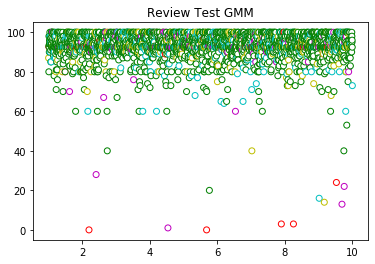

Kategori 'very bad' (0) sebagian besar berada pada cluster 0

Jumlah data
cluster 0 = 4
cluster 2 = 1
cluster 3 = 1
cluster 4 = 2

Kategori 'bad' (1) sebagian besar berada pada cluster 4

Jumlah data
cluster 0 = 1
cluster 1 = 1
cluster 4 = 2


Kategori 'average' (2) sebagian besar berada pada cluster 1

Jumlah data
cluster 1 = 3
cluster 3 = 1


Kategori 'good' (3) sebagian besar berada pada cluster 1

Jumlah data
cluster 1 = 52
cluster 2 = 16
cluster 3 = 7
cluster 4 = 4


Kategori 'very good' (4) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 19
cluster 1 = 1838
cluster 2 = 311
cluster 3 = 245
cluster 4 = 102


In [ ]:
x = np.linspace(1, 10, num=len(dataReviewTest))
colors = np.where(predicttest==0,'r',
            np.where(predicttest==1,'g',
            np.where(predicttest==2,'c',
            np.where(predicttest==3,'y','m'))))

plt.scatter(x, dataTest.review_scores_rating, edgecolors=colors, color='w')
plt.title('Review Test GMM')
plt.show()

temp = {
    'actual': dataReviewTest,
    'prediction': predicttest
}

cmp = pd.DataFrame (temp)

verybad = np.where(cmp.actual == 0, cmp.prediction, -1)
bad = np.where(cmp.actual == 1, cmp.prediction, -1)
average = np.where(cmp.actual == 2, cmp.prediction, -1) 
good = np.where(cmp.actual == 3, cmp.prediction, -1)
verygood = np.where(cmp.actual == 4, cmp.prediction, -1)

cluster1, count1= np.unique(verybad, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(bad, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(average, return_counts=True)
count3[0] = 0
cluster4, count4= np.unique(good, return_counts=True)
count4[0] = 0
cluster5, count5= np.unique(verygood, return_counts=True)
count5[0] = 0

print(f"Kategori 'very bad' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'bad' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'average' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")
    
print(f"\n\nKategori 'good' (3) sebagian besar berada pada cluster {cluster4[np.argmax(count4)]}")
print('\nJumlah data')


for i in range (len(cluster4)-1):
    print(f"cluster {cluster4[i+1]} = {count4[i+1]}")
    
print(f"\n\nKategori 'very good' (4) sebagian besar berada pada cluster {cluster5[np.argmax(count5)]}")
print('\nJumlah data')


for i in range (len(cluster5)-1):
    print(f"cluster {cluster5[i+1]} = {count5[i+1]}")
    

### Data Distribution of 'price' 

In [ ]:
gmm = mixture.GaussianMixture(n_components=3, init_params='random').fit(dataInputMain) #ganti 5 kykny lebih cocok
predicttrain = gmm.predict(dataInputMain)
predicttest = gmm.predict(dataInputMainTest)

- Plot of 'price' training data using GMM

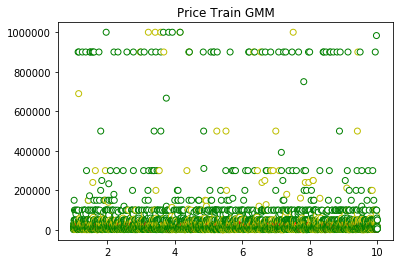

Kategori 'cheap' (0) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 27
cluster 1 = 3507
cluster 2 = 507
cluster 3 = 589
cluster 4 = 97

Kategori 'average' (1) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 6
cluster 1 = 2245
cluster 2 = 455
cluster 3 = 138
cluster 4 = 59


Kategori 'expensive' (2) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 71
cluster 1 = 1782
cluster 2 = 382
cluster 3 = 226
cluster 4 = 348


In [ ]:
x = np.linspace(1, 10, num=len(dataPrice))
colors = np.where(predicttrain==0,'r',
            np.where(predicttrain==1,'g', 'y'))
plt.scatter(x, dataTrain.price, edgecolors=colors, color='w')
plt.title('Price Train GMM')
plt.show()


temp = {
    'actual': dataPrice,
    'prediction': predicttrain
}

cmp = pd.DataFrame (temp)

cheap = np.where(cmp.actual == 0, cmp.prediction, -1)
average = np.where(cmp.actual == 1, cmp.prediction, -1)
expensive = np.where(cmp.actual == 2, cmp.prediction, -1) 

cluster1, count1= np.unique(cheap, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(average, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(expensive, return_counts=True)
count3[0] = 0

print(f"Kategori 'cheap' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'average' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'expensive' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")

- Plot of 'price' testing data using GMM

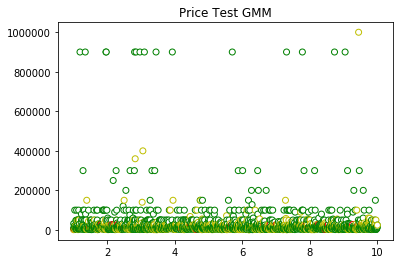

Kategori 'cheap' (0) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 7
cluster 1 = 838
cluster 2 = 107
cluster 3 = 153
cluster 4 = 17

Kategori 'average' (1) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 2
cluster 1 = 577
cluster 2 = 124
cluster 3 = 44
cluster 4 = 11


Kategori 'expensive' (2) sebagian besar berada pada cluster 1

Jumlah data
cluster 0 = 15
cluster 1 = 479
cluster 2 = 97
cluster 3 = 57
cluster 4 = 82


In [ ]:
x = np.linspace(1, 10, num=len(dataPriceTest))
colors = np.where(predicttest==0,'r',
            np.where(predicttest==1,'g', 'y'))
plt.scatter(x, dataTest.price, edgecolors=colors, color='w')
plt.title('Price Test GMM')
plt.show()

temp = {
    'actual': dataPriceTest,
    'prediction': predicttest
}

cmp = pd.DataFrame (temp)

cheap = np.where(cmp.actual == 0, cmp.prediction, -1)
average = np.where(cmp.actual == 1, cmp.prediction, -1)
expensive = np.where(cmp.actual == 2, cmp.prediction, -1) 

cluster1, count1= np.unique(cheap, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(average, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(expensive, return_counts=True)
count3[0] = 0

print(f"Kategori 'cheap' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'average' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'expensive' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")

# Gaussian Mixture Model Results Analysis

#### Review_scores_rating

Training data of tends to be divided into 2 dominant clusters out of 5 clusters, in which:
- 1st cluster contains 'very bad'
- 2nd cluster contains 'bad', 'average','good, dan 'very good'

Testing data tends to be divided into 3 dominant clusters out of 5 clusters, in which:
- 1st cluster contains 'very bad'
- 2nd cluster contains 'bad'
- 3rd cluster contains 'average', 'good', & 'very good'

#### Price

Both the training and testing data tend to be in 1 dominant cluster out of 3 existing clusters. 

# VI. K-Means Clustering

- Data Distribution of 'review_scores_rating'

In [ ]:
from sklearn import cluster

kmeans = cluster.KMeans(n_clusters=5).fit(dataInputMain)
predicttrain = kmeans.predict(dataInputMain)
predicttest = kmeans.predict(dataInputMainTest)


- Plot of 'review_scores_rating' training data using K-Means

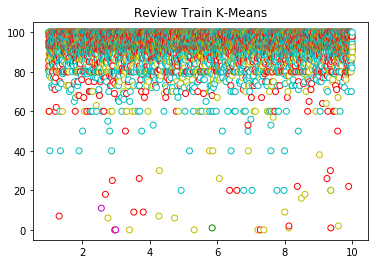

Kategori 'very bad' (0) sebagian besar berada pada cluster 3

Jumlah data
cluster 0 = 8
cluster 1 = 1
cluster 3 = 12
cluster 4 = 2

Kategori 'bad' (1) sebagian besar berada pada cluster 0

Jumlah data
cluster 0 = 8
cluster 2 = 6
cluster 3 = 4


Kategori 'average' (2) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 3
cluster 2 = 18
cluster 3 = 4


Kategori 'good' (3) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 92
cluster 2 = 186
cluster 3 = 81


Kategori 'very good' (4) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 3061
cluster 2 = 4775
cluster 3 = 2173
cluster 4 = 5


In [ ]:
x = np.linspace(1, 10, num=len(dataReview))
colors = np.where(predicttrain==0,'r',
            np.where(predicttrain==1,'g',
            np.where(predicttrain==2,'c',
            np.where(predicttrain==3,'y','m'))))
plt.scatter(x, dataTrain.review_scores_rating, edgecolors=colors, color='w')
plt.title('Review Train K-Means')
plt.show()


temp = {
    'actual': dataReview,
    'prediction': predicttrain
}

cmp = pd.DataFrame (temp)

verybad = np.where(cmp.actual == 0, cmp.prediction, -1)
bad = np.where(cmp.actual == 1, cmp.prediction, -1)
average = np.where(cmp.actual == 2, cmp.prediction, -1) 
good = np.where(cmp.actual == 3, cmp.prediction, -1)
verygood = np.where(cmp.actual == 4, cmp.prediction, -1)

cluster1, count1= np.unique(verybad, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(bad, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(average, return_counts=True)
count3[0] = 0
cluster4, count4= np.unique(good, return_counts=True)
count4[0] = 0
cluster5, count5= np.unique(verygood, return_counts=True)
count5[0] = 0

print(f"Kategori 'very bad' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'bad' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'average' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")
    
print(f"\n\nKategori 'good' (3) sebagian besar berada pada cluster {cluster4[np.argmax(count4)]}")
print('\nJumlah data')


for i in range (len(cluster4)-1):
    print(f"cluster {cluster4[i+1]} = {count4[i+1]}")
    
print(f"\n\nKategori 'very good' (4) sebagian besar berada pada cluster {cluster5[np.argmax(count5)]}")
print('\nJumlah data')


for i in range (len(cluster5)-1):
    print(f"cluster {cluster5[i+1]} = {count5[i+1]}")
    

- Plot of 'review_scores_rating' testing data using K-Means

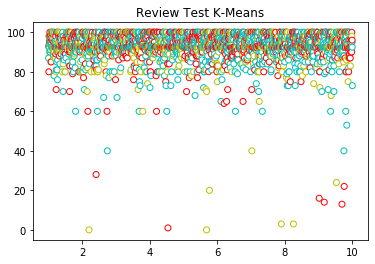

Kategori 'very bad' (0) sebagian besar berada pada cluster 0

Jumlah data
cluster 0 = 4
cluster 3 = 4

Kategori 'bad' (1) sebagian besar berada pada cluster 0

Jumlah data
cluster 0 = 2
cluster 3 = 2


Kategori 'average' (2) sebagian besar berada pada cluster 2

Jumlah data
cluster 2 = 3
cluster 3 = 1


Kategori 'good' (3) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 22
cluster 2 = 39
cluster 3 = 18


Kategori 'very good' (4) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 770
cluster 2 = 1177
cluster 3 = 567
cluster 4 = 1


In [ ]:
x = np.linspace(1, 10, num=len(dataReviewTest))
colors = np.where(predicttest==0,'r',
            np.where(predicttest==1,'g',
            np.where(predicttest==2,'c',
            np.where(predicttest==3,'y','m'))))

plt.scatter(x, dataTest.review_scores_rating, edgecolors=colors, color='w')
plt.title('Review Test K-Means')
plt.show()

temp = {
    'actual': dataReviewTest,
    'prediction': predicttest
}

cmp = pd.DataFrame (temp)

verybad = np.where(cmp.actual == 0, cmp.prediction, -1)
bad = np.where(cmp.actual == 1, cmp.prediction, -1)
average = np.where(cmp.actual == 2, cmp.prediction, -1) 
good = np.where(cmp.actual == 3, cmp.prediction, -1)
verygood = np.where(cmp.actual == 4, cmp.prediction, -1)

cluster1, count1= np.unique(verybad, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(bad, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(average, return_counts=True)
count3[0] = 0
cluster4, count4= np.unique(good, return_counts=True)
count4[0] = 0
cluster5, count5= np.unique(verygood, return_counts=True)
count5[0] = 0

print(f"Kategori 'very bad' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'bad' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'average' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")
    
print(f"\n\nKategori 'good' (3) sebagian besar berada pada cluster {cluster4[np.argmax(count4)]}")
print('\nJumlah data')


for i in range (len(cluster4)-1):
    print(f"cluster {cluster4[i+1]} = {count4[i+1]}")
    
print(f"\n\nKategori 'very good' (4) sebagian besar berada pada cluster {cluster5[np.argmax(count5)]}")
print('\nJumlah data')


for i in range (len(cluster5)-1):
    print(f"cluster {cluster5[i+1]} = {count5[i+1]}")
    

- Data Distribution of 'price'

In [ ]:
kmeans = cluster.KMeans(n_clusters=3).fit(dataInputMain)
predicttrain = kmeans.predict(dataInputMain)
predicttest = kmeans.predict(dataInputMainTest)

- Plot of 'price' training data using K-Means

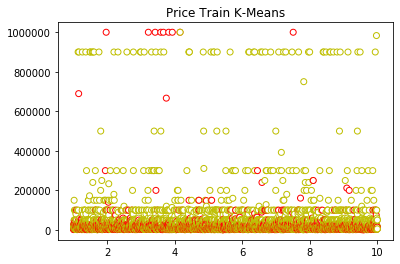

Kategori 'cheap' (0) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 1535
cluster 2 = 2481
cluster 3 = 711

Kategori 'average' (1) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 922
cluster 2 = 1475
cluster 3 = 506


Kategori 'expensive' (2) sebagian besar berada pada cluster 3

Jumlah data
cluster 0 = 715
cluster 1 = 1
cluster 2 = 1029
cluster 3 = 1057
cluster 4 = 7


In [ ]:
x = np.linspace(1, 10, num=len(dataPrice))
colors = np.where(predicttrain==0,'r',
            np.where(predicttrain==1,'g', 'y'))
plt.scatter(x, dataTrain.price, edgecolors=colors, color='w')
plt.title('Price Train K-Means')
plt.show()


temp = {
    'actual': dataPrice,
    'prediction': predicttrain
}

cmp = pd.DataFrame (temp)

cheap = np.where(cmp.actual == 0, cmp.prediction, -1)
average = np.where(cmp.actual == 1, cmp.prediction, -1)
expensive = np.where(cmp.actual == 2, cmp.prediction, -1) 

cluster1, count1= np.unique(cheap, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(average, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(expensive, return_counts=True)
count3[0] = 0

print(f"Kategori 'cheap' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'average' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'expensive' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")

- Plot of 'price' testing data using K-Means

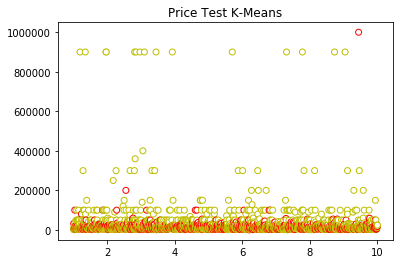

Kategori 'cheap' (0) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 345
cluster 2 = 581
cluster 3 = 196

Kategori 'average' (1) sebagian besar berada pada cluster 2

Jumlah data
cluster 0 = 254
cluster 2 = 380
cluster 3 = 124


Kategori 'expensive' (2) sebagian besar berada pada cluster 3

Jumlah data
cluster 0 = 199
cluster 2 = 258
cluster 3 = 272
cluster 4 = 1


In [ ]:
x = np.linspace(1, 10, num=len(dataPriceTest))
colors = np.where(predicttest==0,'r',
            np.where(predicttest==1,'g', 'y'))
plt.scatter(x, dataTest.price, edgecolors=colors, color='w')
plt.title('Price Test K-Means')
plt.show()

temp = {
    'actual': dataPriceTest,
    'prediction': predicttest
}

cmp = pd.DataFrame (temp)

cheap = np.where(cmp.actual == 0, cmp.prediction, -1)
average = np.where(cmp.actual == 1, cmp.prediction, -1)
expensive = np.where(cmp.actual == 2, cmp.prediction, -1) 

cluster1, count1= np.unique(cheap, return_counts=True)
count1[0] = 0
cluster2, count2= np.unique(average, return_counts=True)
count2[0] = 0
cluster3, count3= np.unique(expensive, return_counts=True)
count3[0] = 0

print(f"Kategori 'cheap' (0) sebagian besar berada pada cluster {cluster1[np.argmax(count1)]}")
print('\nJumlah data')


for i in range (len(cluster1)-1):
    print(f"cluster {cluster1[i+1]} = {count1[i+1]}")
    
print(f"\nKategori 'average' (1) sebagian besar berada pada cluster {cluster2[np.argmax(count2)]}")
print('\nJumlah data')


for i in range (len(cluster2)-1):
    print(f"cluster {cluster2[i+1]} = {count2[i+1]}")
    
print(f"\n\nKategori 'expensive' (2) sebagian besar berada pada cluster {cluster3[np.argmax(count3)]}")
print('\nJumlah data')


for i in range (len(cluster3)-1):
    print(f"cluster {cluster3[i+1]} = {count3[i+1]}")

# K-Means Results Analysis

#### Review_Scores_Rating

Training data of tends to be divided into 3 dominant clusters out of 5 clusters, in which:

- 1st cluster contains 'very bad',
- 2nd cluster contains 'bad'
- 3rd cluster contains 'average', 'good' and 'very good'


Testing data tends to be divided into 2 dominant clusters out of 5 clusters, in which:

- 1st cluster contains 'very bad' and 'bad
- 2nd cluster contains 'good' and 'very good'


#### Price

Both the training and testing data tend to be in 2 dominant cluster out of 3 existing clusters, in which:
dominan dari 3 cluster dimana:
- 1st cluster contains 'cheap' and 'average'
- 2nd cluster contains 'expensive'